# Convolutional Neural Networks and Computer Vision

# Get the data

In [1]:
import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zip_ref = zipfile.ZipFile('pizza_steak.zip')
# zip_ref.extractall()
# zip_ref.close()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 1 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
    target_folder = target_dir + '/' + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    # print(random_image)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 384, 3)


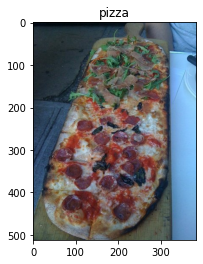

In [5]:
img = view_random_images('pizza_steak/train', 'pizza')

In [6]:
# import tensorflow as tf
# img = tf.constant(img)
# img.shape, img.dtype, img.ndim
# img = img / 255
# img

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen_non = ImageDataGenerator(
    rescale=1.0 / 255,
)
valid_datagen_non = ImageDataGenerator(
    rescale=1.0 / 255,
)


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
)
valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data_non = train_datagen.flow_from_directory(
    train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42
)
valid_data_non = valid_datagen.flow_from_directory(
    test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42
)


train_data = train_datagen.flow_from_directory(
    train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True
)
valid_data = valid_datagen.flow_from_directory(
    test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True
)

model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.InputLayer((224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(32, kernel_size=5, activation="relu"))
# model_1.add(tf.keras.layers.Conv2D(32, kernel_size=5, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))

model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
# model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))

model_1.add(tf.keras.layers.Dropout(0.5))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history_1 = model_1.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
    # callbacks=[tensorboard_callback]
)


In [ ]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 108, 108, 10)      2890      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


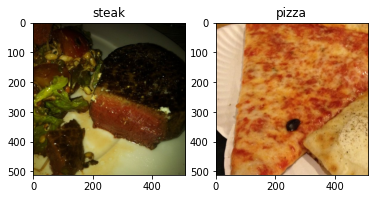

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_images("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_images("pizza_steak/train", "pizza")


<AxesSubplot:>

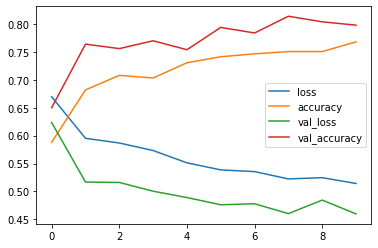

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot()

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.xlabel('Epochs')
    plt.title('accuracy')
    plt.legend()


**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset!

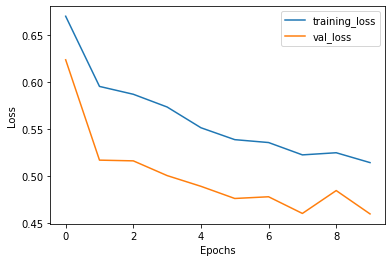

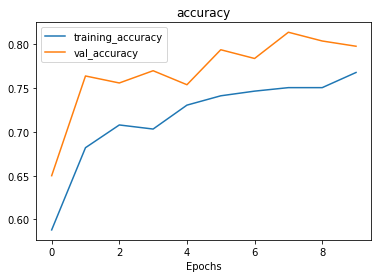

In [ ]:
plot_loss_curves(history_1)

In [ ]:
images, labels = train_data.next()
non_augmented_images, non_augmented_labels = train_data_non.next()

Showing image number: 18


Text(0.5, 1.0, 'Augmented images')

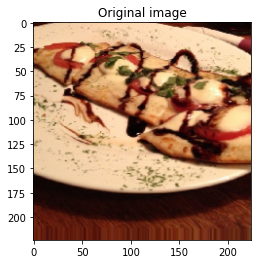

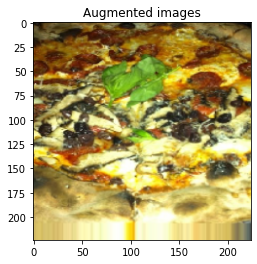

In [ ]:
import random

random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(non_augmented_images[random_number])
plt.title(f"Original image")
plt.figure()
plt.imshow(images[random_number])
plt.title("Augmented images")


TensorShape([4032, 3024, 3])

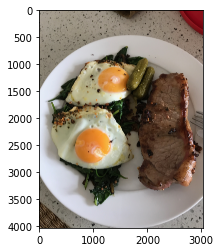

In [ ]:
steak = "03-steak.jpeg"
steak = mpimg.imread(steak)
plt.imshow(steak)

steak = tf.constant(steak)
steak = steak / 255
steak.shape
# tf.reshape(steak, ([224,224,3]))

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img / 255
    return img

steak = load_and_prep_image("03-steak.jpeg")



In [ ]:
pred = model_1.predict(tf.expand_dims(steak, axis=0))
pred


array([[0.8376202]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")


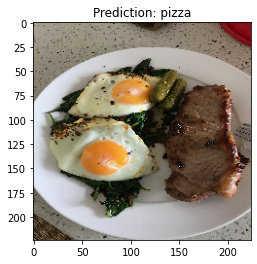

In [ ]:
pred_and_plot(model_1, "03-steak.jpeg")

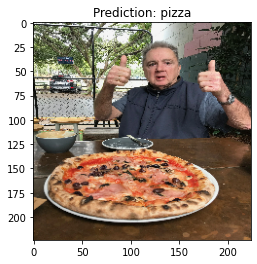

In [ ]:
pred_and_plot(model_1, "03-pizza-dad.jpeg")

# Multi-class Image Classification

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        height_shift_range=0.2,
        width_shift_range=0.2,
        rotation_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)


model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.InputLayer((224,224, 3)))
# model_2.add(tf.keras.layers.Conv2D(32, kernel_size=3, strides=(2,2), activation='relu'))
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=3, strides=(2,2), activation='relu'))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# model_2.add(tf.keras.layers.Conv2D(32, kernel_size=3, strides=(2,2), activation='relu'))
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=3, strides=(2,2), activation='relu'))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model_2.add(tf.keras.layers.Dropout(0.5))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(train_generator, epochs=10, validation_data=validation_generator,steps_per_epoch=len(train_generator), validation_steps=len(validation_generator))



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/10
235/235 [==============================] - 114s 484ms/step - loss: 2.1832 - accuracy: 0.1967 - val_loss: 2.0082 - val_accuracy: 0.2876
Epoch 2/10
235/235 [==============================] - 114s 484ms/step - loss: 2.0642 - accuracy: 0.2669 - val_loss: 1.9085 - val_accuracy: 0.3364
Epoch 3/10
235/235 [==============================] - 114s 485ms/step - loss: 2.0127 - accuracy: 0.2981 - val_loss: 1.8536 - val_accuracy: 0.3548
Epoch 4/10
235/235 [==============================] - 114s 486ms/step - loss: 1.9682 - accuracy: 0.3172 - val_loss: 1.8649 - val_accuracy: 0.3552
Epoch 5/10
235/235 [==============================] - 113s 483ms/step - loss: 1.9408 - accuracy: 0.3279 - val_loss: 1.7810 - val_accuracy: 0.3876
Epoch 6/10
235/235 [==============================] - 112s 478ms/step - loss: 1.9051 - accuracy: 0.3391 - val_loss: 1.7505 - val_accuracy: 0.4240
Epoch 7/10
235/235 [==================

# Evaluate the model

In [ ]:
model_2.evaluate(validation_generator)


In [ ]:
plot_loss_curves(history_2)


In [ ]:
def pred_and_plot_categorical(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis=0))

    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")

In [ ]:
pred_and_plot_categorical(model_2, "03-pizza-dad.jpeg", class_names)

In [ ]:
model_2.save('model_food_poor.h5')